In [2]:
import random, numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

### Loading the module

In [4]:
%run ../stochastic_fractal_m.py

### User can change these values

In [6]:
alphap = 2
probp = 0.75

ensemble_size = 500*1
time_iteration = 1000*100
min_iteration = 1000*10

# number_of_points = 21

iteration_step = 5000

## Directories

In [8]:
dir_data = "../data/alpha{}/".format(alphap)
dir_fig  ="../figures/alpha{}/".format(alphap)


## While testing
dir_data = "../data/temp/alpha{}/".format(alphap)
dir_fig  ="../figures/temp/alpha{}/".format(alphap)

# create directory if it does not exists
for dir_name in [dir_data, dir_fig]:
    if not os.path.isdir(dir_name):
        os.mkdir(dir_name)
        print("directory ", dir_name, " is created")
    else:
        print("directory ", dir_name, " exists")
    pass

### Filename
filename = "fractal_dim_alpha_{}_p_{}".format(alphap, int(probp*100))
out_data_filename = dir_data +filename
print(out_data_filename)

directory  ../data/temp/alpha2/  exists
directory  ../figures/temp/alpha2/  exists
../data/temp/alpha2/fractal_dim_alpha_2_p_75


## Simulation using Class

In [9]:
sf_numberlength = NumberLength(alpha=alphap, probability=probp)
sf_numberlength.log(True)

kwargs  {'alpha': 2, 'probability': 0.75}


In [10]:
data = sf_numberlength.run_ensemble(ensemble_size, time_iteration, min_iteration, iteration_step)

realization  5  . Time spent  0.5488831996917725  sec
realization  10  . Time spent  0.5214829444885254  sec
realization  15  . Time spent  0.5227832794189453  sec
realization  20  . Time spent  0.5035507678985596  sec
realization  25  . Time spent  0.5431959629058838  sec
realization  30  . Time spent  0.5246503353118896  sec
realization  35  . Time spent  0.5111258029937744  sec
realization  40  . Time spent  0.5288217067718506  sec
realization  45  . Time spent  0.5169024467468262  sec
realization  50  . Time spent  0.53389573097229  sec
realization  55  . Time spent  0.5428071022033691  sec
realization  60  . Time spent  0.6287319660186768  sec
realization  65  . Time spent  0.5313270092010498  sec
realization  70  . Time spent  0.6024982929229736  sec
realization  75  . Time spent  0.5870826244354248  sec
realization  80  . Time spent  0.6164536476135254  sec
realization  85  . Time spent  0.5678668022155762  sec
realization  90  . Time spent  0.5844120979309082  sec
realization  

In [12]:
N1_average, M1_average = data.T

In [13]:
M1_average

array([0.45224623, 0.43978717, 0.43059937, 0.42350657, 0.4183882 ,
       0.41294226, 0.40912691, 0.40549196, 0.40252225, 0.39970919,
       0.3974487 , 0.39562379, 0.39349916, 0.39165019, 0.38994442,
       0.3880568 , 0.38679475, 0.38514662, 0.38368983])

## Plot of $\ln N$ vs $-\ln \delta$

In [14]:
def convert_to_plot(N1_average, M1_average):
    N1_log = np.log(N1_average)
    minus_delta1_log = N1_log - np.log(M1_average)
    regress = stats.linregress(minus_delta1_log, N1_log)
    slope, intercept = regress[0], regress[1]
    return minus_delta1_log, N1_log, slope, intercept

estimated   df =  0.7838431732590255
Theoritical df = 0.778719


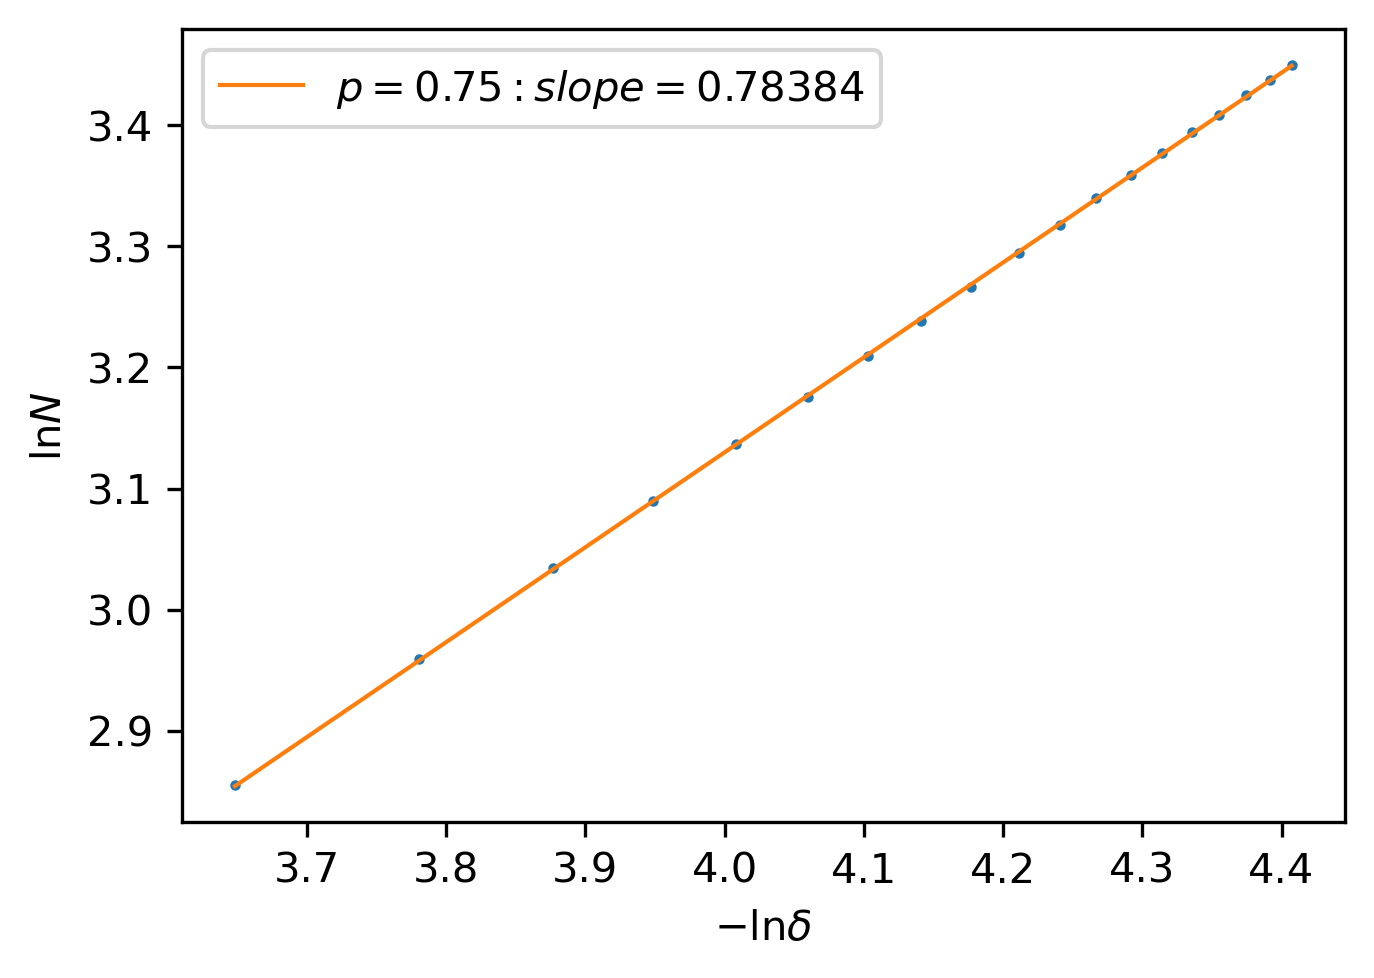

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)
colors = ['tab:blue', 'tab:orange', 'tab:green']

N1_log = np.log(N1_average)
minus_delta1_log = N1_log - np.log(M1_average)

regress = stats.linregress(minus_delta1_log, N1_log)
plt.plot(minus_delta1_log, N1_log, "o", markersize=1.5)
y_fitted = minus_delta1_log*regress[0] + regress[1]
plt.plot(minus_delta1_log, y_fitted, label=r"$p={:.2f}: slope={:.5f}$".format(probp, regress[0]), linewidth=1)

plt.xlabel(r"$-\ln \delta$")
plt.ylabel(r"$\ln N$")
plt.legend(loc=2)
axes.set_position([0.15,0.15,0.75,0.75])


print("estimated   df = ", slope)
ana_soln = AnalyticSoln()
print("Theoritical df =", ana_soln.find_df(alphap, probp))

# print(fig_filename)
# plt.savefig(fig_filename)

## Plot of  $-\ln \delta$ vs $\ln t$

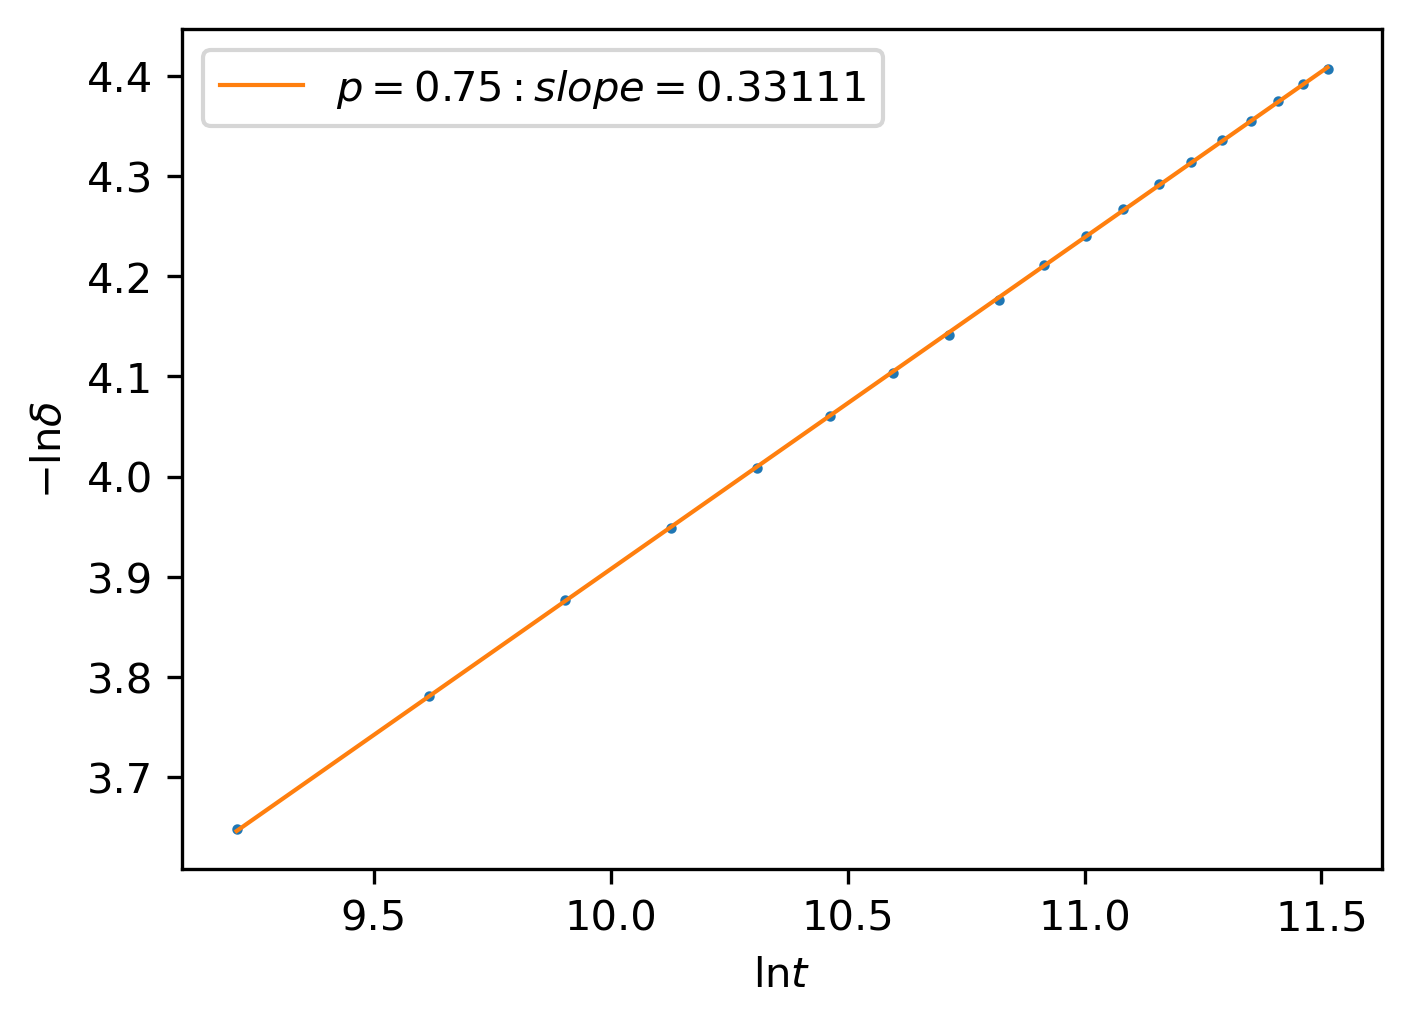

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3.5), dpi=300)

t = np.arange(min_iteration, time_iteration + 1, iteration_step)
log_t = np.log(t)

regress = stats.linregress(log_t, minus_delta1_log)
plt.plot(log_t, minus_delta1_log, 'o', markersize=1.5)
y_fitted = log_t*regress[0] + regress[1]
plt.plot(log_t, y_fitted, label=r"$p={:.2f}: slope={:.5f}$".format(probp, regress[0]), linewidth=1)

plt.xlabel(r"$\ln t$")
plt.ylabel(r"$-\ln \delta$")
plt.legend(loc=2)
axes.set_position([0.15, 0.15, 0.8, 0.8])

## Write data to file

In [22]:
header = dict()
header['alpha'] = alphap
header['probability'] = probp
header['ensemble_size']=ensemble_size
header['total_time_iteraion']=time_iteration
header['min_time_iteraion']=min_iteration
header['cols'] = ["t", "N", "M"]

time_col = np.arange(min_iteration, time_iteration+1, iteration_step)

header_str = json.dumps(header)
print(header_str)
print(out_data_filename)
# np.savetxt(out_data_filename, np.c_[time_col, N1_average, M1_average], header=header_str)

{"alpha": 2, "probability": 0.75, "ensemble_size": 500, "total_time_iteraion": 100000, "min_time_iteraion": 10000, "cols": ["t", "N", "M"]}
../data/temp/alpha2/fractal_dim_alpha_2_p_75


In [23]:
time_col

array([ 10000,  15000,  20000,  25000,  30000,  35000,  40000,  45000,
        50000,  55000,  60000,  65000,  70000,  75000,  80000,  85000,
        90000,  95000, 100000])